# **Macroeconomic analysis - pandemics**

**The objective of this analysis is to examine how the macroeconomic indicators affect the stock prices in Hong Kong.**

To make the research more interesting, the data was split into two different time frames:
1. Data before the pandemics (April 2018 to December 2019)
2. Data after the pandemics (January 2020 to March 2021)


Data Source:
1. Monthly HSI - Yahoo Fianace
2. Transaction records - Centaline Property
3. Other macroeconomic indicators - Census and statistics department

**Import libraries**

In [11]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install scipy

     |████████████████████████████████| 285 kB 107 kB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 282 kB/s eta 0:00:01    |██████████▎                     | 9.9 MB 247 kB/s eta 0:01:25
ERROR: Could not find a version that satisfies the requirement warnings
ERROR: No matching distribution found for warnings


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import data**

In [60]:
# For google drive

#from google.colab import drive
#from google.colab import files

#drive.mount('/content/drive')
#data_dir = "/content/drive/My Drive/FYP/centaline/"

In [61]:
# For local directory
data_dir = "../../database_real/macroeconomic_data/centaline_chinese/"

In [62]:
hk = ["Kennedy_town_sai_ying_pun", "Bel_air_sasson", "South_horizon", "Aberdeen_ap_lei_chau", "Mid_level_west", "Peak_south",
             "Mid_level_central", "Wanchai_causeway_bay", "Happy_valley_mid_level_east", "North_point", "Mid_level_north_point", 
             "Quarry_bay_kornhill", "Taikoo_shing", "Sai_wan_ho", "Shau_kei_wan_chai_wan", "Heng_fa_chuen"]

kowloon = ["Olympic_station", "Kowloon_station", "Mongkok_yaumatei", "Tsimshatsui_jordan", "Lai_chi_kok", "Nam_cheong", 
                  "Ho_man_tin_kings_park", "To_kwa_wan", "Whampoa_laguna_verde", "Tseung_kwan_o", "Meifoo_wonderland", 
                  "Cheung_sha_wan_sham_shui_po", "Yau_yat_chuen", "Kowloon_tong", "Lam_tin_yau_tong", "Kowloon_bay_ngau_chi_wan", 
                  "Kwun_tong", "Diamond_hill_wong_tai_sin", "Hung_hum", "Kai_tak"]

new_east = ["Sai_kung", "Tai_wai", "Shatin", "Fotan_shatin_kau_to_shan", "Ma_on_shan", "Tai_po_mid_level_hong_lok_yuen", 
                   "Tai_po", "Sheung_shui_fanling_kwu_tung"]

new_west = ["Discovery_bay_other_islands", "Fairview_park_palm_spring_the_vineyard", "Yuen_long", "Tuen_mun", "Tin_shui_wai", 
            "Tsuen_wan_belvedere_garden", "Kwai_chung", "Tsing_yi", "Ma_wan_park_island","Tung_chung_islands", 
            "Sham_tseng_castle_peak_road"]


In [88]:
# Data directory
dir_hk = "./hk_island/"
dir_kowloon = "./kowloon/"
dir_new_east = "./new_east/"
dir_new_west = "./new_west/"

def get_data_by_district(district_name, disctrict_dir):

    district_df = pd.DataFrame()
    for region in district_name:
        new_df = pd.read_csv(data_dir+disctrict_dir+region+".csv")
        district_df = pd.concat([district_df, new_df], axis=0)
    
    district_df = district_df.drop(district_df.columns[0], axis=1)
    district_df['regDate'] = pd.to_datetime(district_df['regDate'], dayfirst=True)
    district_df.sort_values(by=['regDate'], inplace=True, ascending=False)

    district_df = district_df.reset_index()
    district_df = district_df.drop(['index'], axis=1)

    return district_df

def download_data(filename, download_data):
    dataFrame = pd.DataFrame(data=download_data)
    dataFrame.to_csv(filename)
    files.download(filename)

# Get data by distirct
data_df_hk = get_data_by_district(hk, dir_hk)
data_df_kowloon = get_data_by_district(kowloon, dir_kowloon)
data_df_new_east = get_data_by_district(new_east, dir_new_east)
data_df_new_west = get_data_by_district(new_west, dir_new_west)

# Get all district data
data_df_all = pd.concat([data_df_hk, data_df_kowloon, data_df_new_east, data_df_new_west], axis=0)
data_df_all.sort_values(by=['regDate'], inplace=True, ascending=False)
data_df_all = data_df_all.reset_index()
data_df_all = data_df_all.drop(['index'], axis=1)
data_df_all.head()

,address,bedroom,building,district,estate,flat,floor,grossArea,price,regDate,region,saleableArea,upGrossArea,upSaleableArea
0,海逸道8號,2.0,8座,海逸,3期 悅濤灣,D室,低層,730.0,9880000.0,2021-04-17,九龍,586,13534.0,16860.0
1,加惠民道29號,2.0,2座,堅尼地城,加惠臺,C室,高層,588.0,10000000.0,2021-04-16,港島,464,17007.0,21552.0
2,吉利徑15-17號,NaN,吉利徑15-17號,美孚,2期,15號A室,低層,943.0,9130000.0,2021-04-16,九龍,705,9682.0,12950.0
3,青敬路77號,NaN,2座,青衣,海悅花園,H室,中層,708.0,7550000.0,2021-04-16,新界西,590,10664.0,12797.0
4,牙鷹洲街8號,2.0,5座,青衣,2期,D室,低層,658.0,8500000.0,2021-04-16,新界西,531,12918.0,16008.0


In [89]:
# Data preprocessing
new_df = pd.DataFrame()

# Add new features
new_df['upSaleableArea'] = data_df_all['upSaleableArea']
new_df['month'] = pd.to_datetime(data_df_all['regDate']).dt.month
new_df['year'] = pd.to_datetime(data_df_all['regDate']).dt.year

# Handling missinig values
# Fill with mean
unitSaleableArea_mean = new_df['upSaleableArea'].mean()
new_df['upSaleableArea'] = new_df['upSaleableArea'].fillna(unitSaleableArea_mean)
new_df.head()

,upSaleableArea,month,year
0,16860.0,4,2021
1,21552.0,4,2021
2,12950.0,4,2021
3,12797.0,4,2021
4,16008.0,4,2021


In [108]:
monthly_df = new_df.copy()
monthly_df = monthly_df.groupby(['year','month'],as_index=False).mean()
monthly_df = monthly_df.rename(columns={'upSaleableArea': 'AverageUpSaleableArea'})
monthly_df.head()

,year,month,AverageUpSaleableArea
0,2018,4,15425.023404
1,2018,5,16039.831367
2,2018,6,16514.837726
3,2018,7,16986.440472
4,2018,8,16775.006138


In [200]:
# Data directory

df = pd.DataFrame()

df = pd.read_csv("hang_seng_index.csv")
house_price_df = monthly_df
population_df = pd.read_csv("population.csv")
unemployment_rate_df = pd.read_csv("unemployment_rate.csv")
import_export_df = pd.read_csv("import_export.csv")
gdp_df = pd.read_csv("gdp.csv")
consumer_price_indices_df = pd.read_csv("ccp_index.csv")

df = pd.merge(df, house_price_df, how='right', on=['month', 'year'])
df = pd.merge(df, population_df, how='left', on=['month', 'year'])
df = pd.merge(df, unemployment_rate_df, how='left', on=['month', 'year'])
df = pd.merge(df, import_export_df, how='left', on=['month', 'year'])
df = pd.merge(df, gdp_df, how='left', on=['month', 'year'])
df = pd.merge(df, consumer_price_indices_df, how='left', on=['month', 'year'])

# Data processing
df['gdp'] = df['gdp'].str.replace(',', '').astype(float)
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df = df.rename(columns={"Close": "hsi", "AverageUpSaleableArea": "house_price", "number": "population","unemployment_rate_seasonally_adjusted": "unemployment_adjusted", "unemployment_rate_not_adjusted": "unemployment_not_adjusted"})

df = df.dropna()

df.tail()

,year,month,hsi,house_price,population,unemployment_adjusted,unemployment_not_adjusted,imports,total_exports,gdp,ccp_index
31,2020,11,26341.49023,16191.012932,7474.2,6.3,6.3,405177.0,379568.0,713696.0,110.9
32,2020,12,27231.13086,13862.580749,7474.2,6.6,6.3,437947.0,392216.0,713696.0,110.7
33,2021,1,28283.71094,13487.912487,7474.2,7.0,6.5,413208.0,387980.0,713696.0,111.7
34,2021,2,28980.21094,15717.571792,7474.2,7.2,6.8,325776.0,311077.0,713696.0,111.9
35,2021,3,28378.34961,16046.152770,7474.2,7.2,6.8,325776.0,311077.0,713696.0,111.9


**Univariate analysis**

In [201]:
def univariate_analysis(feature_name):
    # Statistical summary
    print(df[feature_name].describe())

    # Histogram
    plt.figure(figsize=(8,4))
    sns.distplot(df[feature_name], axlabel=feature_name);

count       36.000000
mean     26896.220323
std       2007.867878
min      22961.470700
25%      25587.810547
50%      26903.905270
75%      28419.416993
max      30808.449220
Name: hsi, dtype: float64


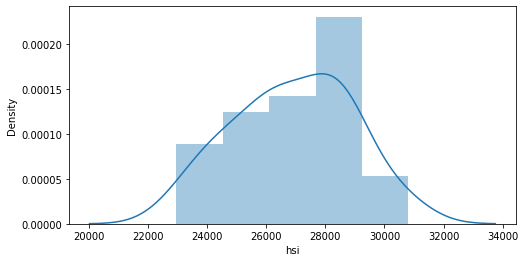

In [202]:
univariate_analysis('hsi')

**Bivariate analysis**

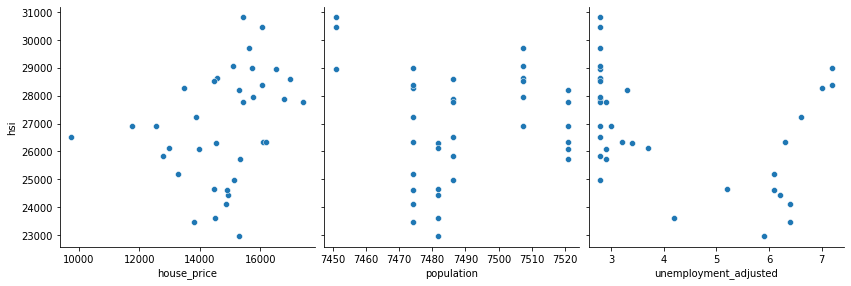

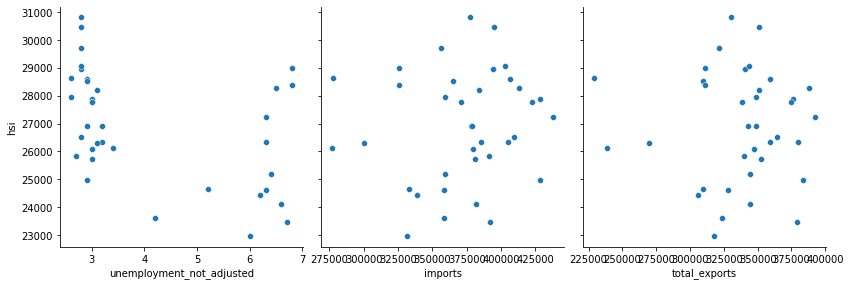

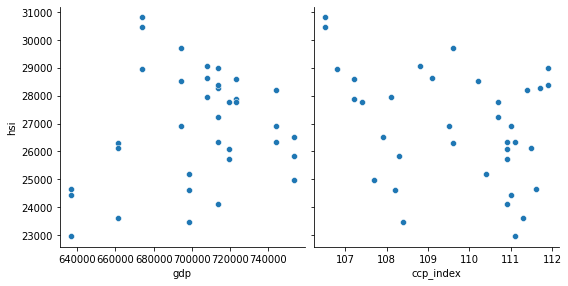

In [203]:
for i in range(3, len(df.columns), 3):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+3],
                y_vars=['hsi'],
                size=4)

In [204]:
def scatter_plot_with_regline(feature_name):
    x = df[feature_name]
    y = df['hsi']

    plt.scatter(x, y)
    plt.xticks(rotation=45)
    fig = sns.regplot(x=feature_name, y="hsi", data=df)

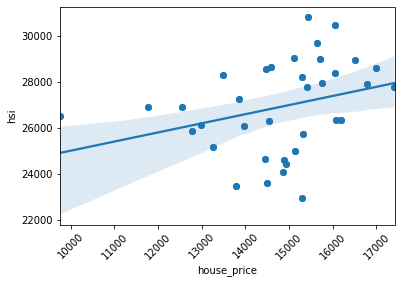

In [205]:
scatter_plot_with_regline("house_price")

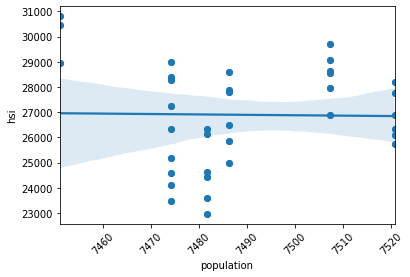

In [206]:
scatter_plot_with_regline("population")

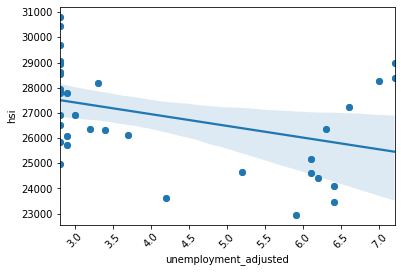

In [207]:
scatter_plot_with_regline("unemployment_adjusted")

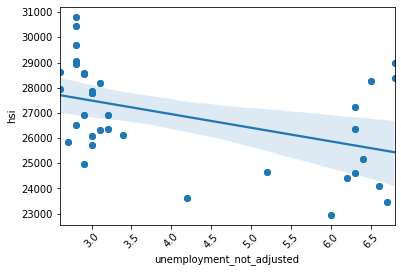

In [208]:
scatter_plot_with_regline("unemployment_not_adjusted")

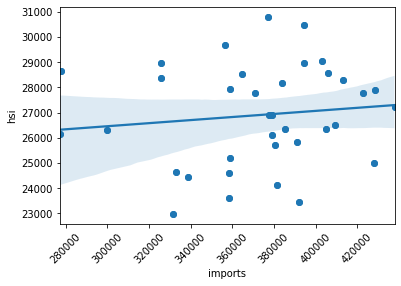

In [209]:
scatter_plot_with_regline("imports")

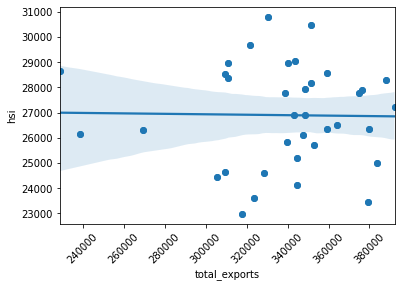

In [210]:
scatter_plot_with_regline("total_exports")

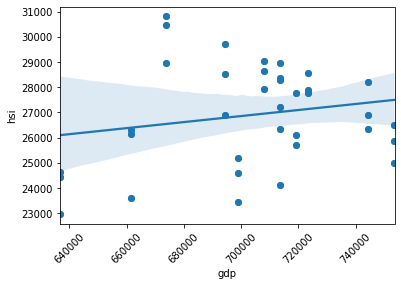

In [211]:
scatter_plot_with_regline("gdp")

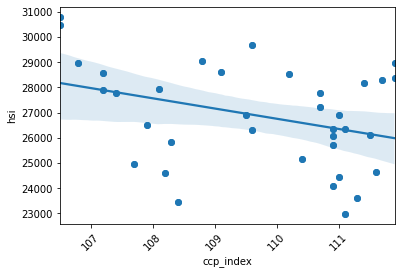

In [212]:
scatter_plot_with_regline("ccp_index")

**Correlation matrix and Heatmap  (Before pandemics)**

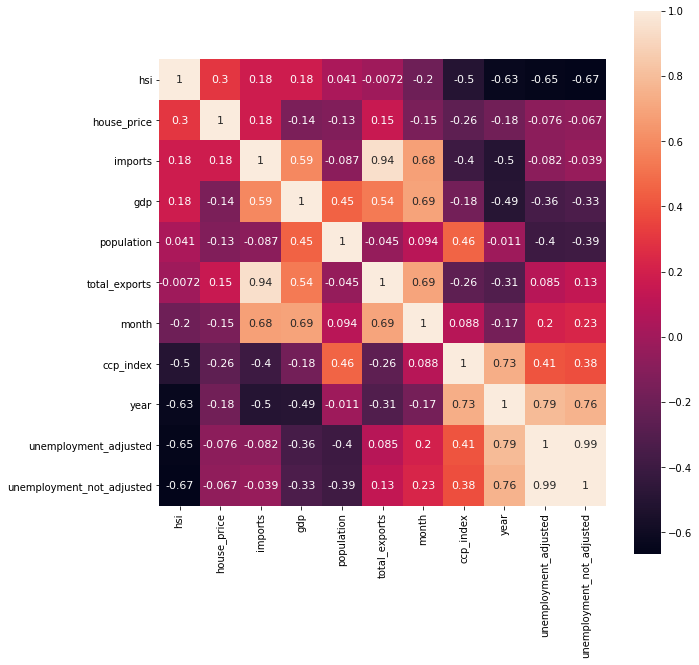

In [216]:
heatmap_df = df.copy()
heatmap_df = heatmap_df[(heatmap_df['year'] < 2021)]

# Heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
cols = heatmap_df.corr().sort_values('hsi', ascending=False).index
cm = np.corrcoef(heatmap_df[cols].values.T)
hm = sns.heatmap(cm, annot=True, square=True, annot_kws={'size':11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Correlation matrix and Heatmap  (After pandemics)**

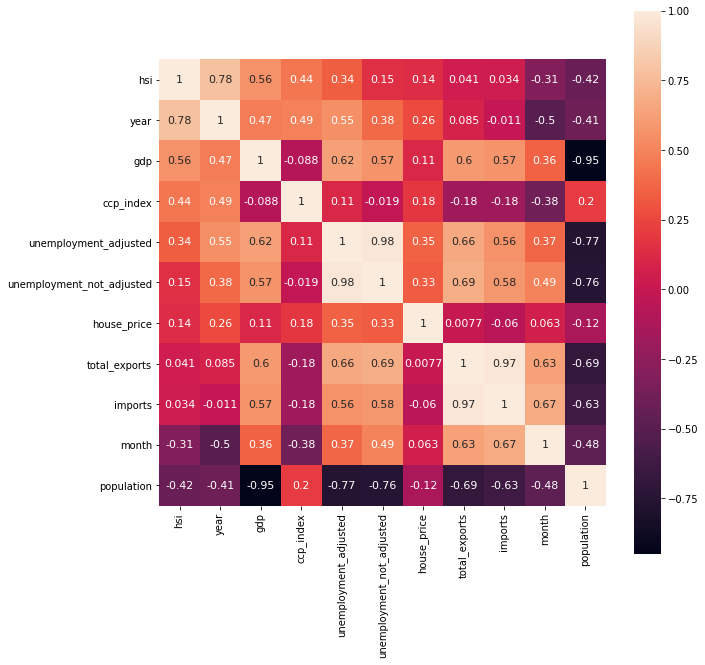

In [217]:
heatmap_df = df.copy()
heatmap_df = heatmap_df[(heatmap_df['year'] >= 2020)]

# Heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
cols = heatmap_df.corr().sort_values('hsi', ascending=False).index
cm = np.corrcoef(heatmap_df[cols].values.T)
hm = sns.heatmap(cm, annot=True, square=True, annot_kws={'size':11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()